In [8]:
%matplotlib notebook

## setup of the system
The optical diagram of a range finder setup for tire tread depth measurements is shown below, assume baseline (b), lens focal length (f) and the sensor signal location (x), we can calculate that the minimal distance from the lens pinhole to the measured surface (d0):
![fig.1 system setup](../figures/RangeFinderDiagram.png)

## laser power requirements for slit design
Assume:
- laser power: p (0.001w)
- slit width: w (100um)
- pixel size: 5.5 * 64 (um)
- reflectivity of tire: R (0.02)
- tire surface to slit: d (20mm)
- slit to sensor: f (8mm)
- exposure time: t (0.001s)
- sensitivity of the sensor: s (79V/lx * s)
we can calculate the amount of light power/lux goes into each pixel:
$$ lux = 1E6 * p * 683 (for 555nm only) * R / (2 * pi * (d + f)**2) $$
$$ v = lux * s * t $$
for default setups we will get 109mv voltage output, or about 1/9 of the dynamic range 


In [3]:
import numpy as np
from sympy import *

from ipywidgets import interact, fixed, interactive
import ipywidgets as widgets
from IPython.display import display

In [4]:
# system parameters
f = 7.9  # mm
fov = 54 # unit degree

In [5]:
w_baseline = widgets.FloatSlider(min=5, max=15, step=0.5, value=5, readout=False)
w_d0 = widgets.Label("foo")
def calc_d0(*args):
    w_baseline.description = 'Baseline {:.1f}mm'.format(w_baseline.value)
    d0_v = w_baseline.value / np.tan(np.radians(fov/2))
    w_d0.value = "Minimal distance from pinhole to tire (d0): {:.2f}mm".format(d0_v)
    return d0_v

calc_d0()    
w_baseline.observe(calc_d0, 'value')

display(w_baseline)
display(w_d0)

In [25]:
# calculate the resolution 
b, x = symbols('b, x') # b: baseline, x: signal location on sensor calculated from sensor end.
d0 = b / np.tan(np.radians(fov/2))
d = (x * d0**2) / (b * f - x * d0)
dd = simplify(diff(d, x))
pprint(dd)

     30.4295359709215⋅b    
───────────────────────────
                          2
(1.96261050550515⋅x - 7.9) 


In [48]:
x_res = 
x_res = 0.0055
d_res = dd * x_res
d_res_min = d_res.subs({b:10, d0:20, f:7.9, x:0})
d_res_max = d_res.subs({b:10, d0:20, f:7.9, x:2.5})
print(d_res_min, d_res_max)

102.915079512958 0.0732796552294959


In [96]:
s = widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=False,
    readout_format='i',
    slider_color='white',
    color='black'
)
t = widgets.Label("{}".format(s.value))
widgets.HBox([t, s])

x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    print(*args)
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

from IPython.display import display
display(x_widget)
display(y_widget)

int_range = widgets.IntSlider()
display(int_range)

def on_value_change(*change):
    print(change)

int_range.observe(on_value_change, names='value')

{'old': 5.0, 'new': 4.9, 'name': 'value', 'owner': <ipywidgets.widgets.widget_float.FloatSlider object at 0x0000000008E997B8>, 'type': 'change'}
{'old': 4.9, 'new': 5.0, 'name': 'value', 'owner': <ipywidgets.widgets.widget_float.FloatSlider object at 0x0000000008E997B8>, 'type': 'change'}
{'old': 5.0, 'new': 5.1, 'name': 'value', 'owner': <ipywidgets.widgets.widget_float.FloatSlider object at 0x0000000008E997B8>, 'type': 'change'}
{'old': 5.1, 'new': 5.2, 'name': 'value', 'owner': <ipywidgets.widgets.widget_float.FloatSlider object at 0x0000000008E997B8>, 'type': 'change'}
{'old': 5.2, 'new': 5.35, 'name': 'value', 'owner': <ipywidgets.widgets.widget_float.FloatSlider object at 0x0000000008E997B8>, 'type': 'change'}
{'old': 5.35, 'new': 5.75, 'name': 'value', 'owner': <ipywidgets.widgets.widget_float.FloatSlider object at 0x0000000008E997B8>, 'type': 'change'}
{'old': 5.75, 'new': 6.05, 'name': 'value', 'owner': <ipywidgets.widgets.widget_float.FloatSlider object at 0x0000000008E997B8>

In [7]:
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

imgs = glob(r"C:\Users\MPNV38\ZDevelop\TireTread\data\20170206\*.bmp")

plt.ion()
plt.figure()
for img_file in imgs:
    img = np.array(Image.open(img_file).convert("L")).astype('float')
    line = img.mean(axis=0)
    plt.plot(line)

from scipy.optimize import curve_fit


n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title('Fig. 3 - Fit for Time Constant')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()
    

## setup of the system
The optical diagram of a range finder setup for tire tread depth measurements is shown below, assume baseline (b), lens focal length (f), we can calculate what is the combination of b and f can give the best focus for all distances.
![fig.2 SE655 based system setup](../figures/RangeFinderDesignDimensions.png)

a simulation on what lens tilt angle (a0) and baseline (b) makes the focus on the sensor to be consistantly sharp across the whole range


<IPython.core.display.Javascript object>


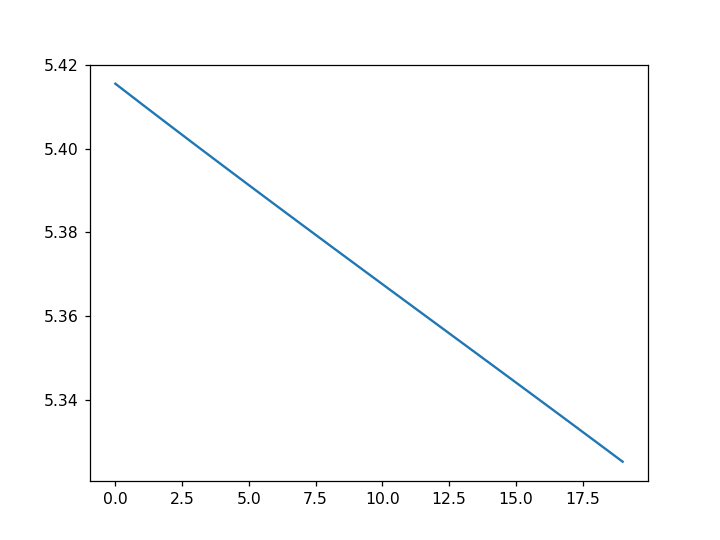

In [75]:
f = 5.37
# a0 = np.radians(29)
# b = 10

for b in [10.2]:
# for b in np.linspace(8, 10, 5):
    plt.figure()
#     for a0 in np.linspace(np.radians(27), np.radians(29), 3):
    for a0 in [np.radians(29)]:
    #     t = b*f/(np.tan(a0)*(b/np.sin(a0) - f))*np.cos(a0)
        d10 = b/np.sin(a0)
        d20 = 1/(1/f - 1/d10)
        t = d20 * np.cos(a0)
        # for b in np.arange(8, 10.1, 0.1):
        fs = []
        for a in np.linspace(a0-np.radians(10), a0+np.radians(10), 20):
            d1 = b/np.sin(a) * np.cos(a - a0)
            d2 = t/np.cos(a) * np.cos(a - a0)
            fs.append(d1*d2/(d1+d2))
        plt.plot(fs)

    
# d2 = d0/np.
# f = 5.37

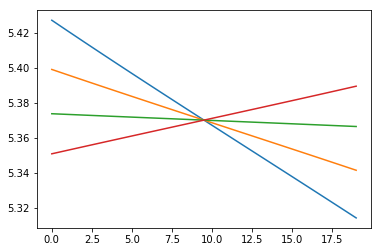

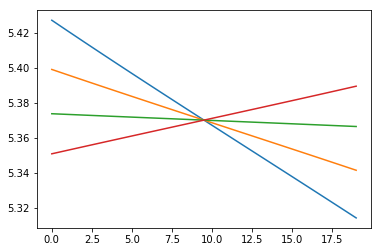

In [7]:
plt.show()